In [3]:
import numpy as np
import pandas as pd


In [4]:
columns=pd.read_table("diabetes_data_upload.csv",delimiter=',')

In [5]:
columns.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [6]:
for col in columns.columns:
    if col!='Age' and col!='Gender' and col!='class':
        columns[col]=[1 if c=='Yes' else 0 for c in columns[col]]
    if col=='class':
        columns[col]=[1 if c=='Positive' else 0 for c in columns[col]]
    if col=='Gender':
        columns[col]=[1 if c=='Male' else 0 for c in columns[col]]


In [7]:
from sklearn import tree

In [8]:
dtr = tree.DecisionTreeRegressor(max_depth=10)

In [9]:
dtr.fit(columns.values[:,:15],columns.values[:,16])

DecisionTreeRegressor(criterion='mse', max_depth=10, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

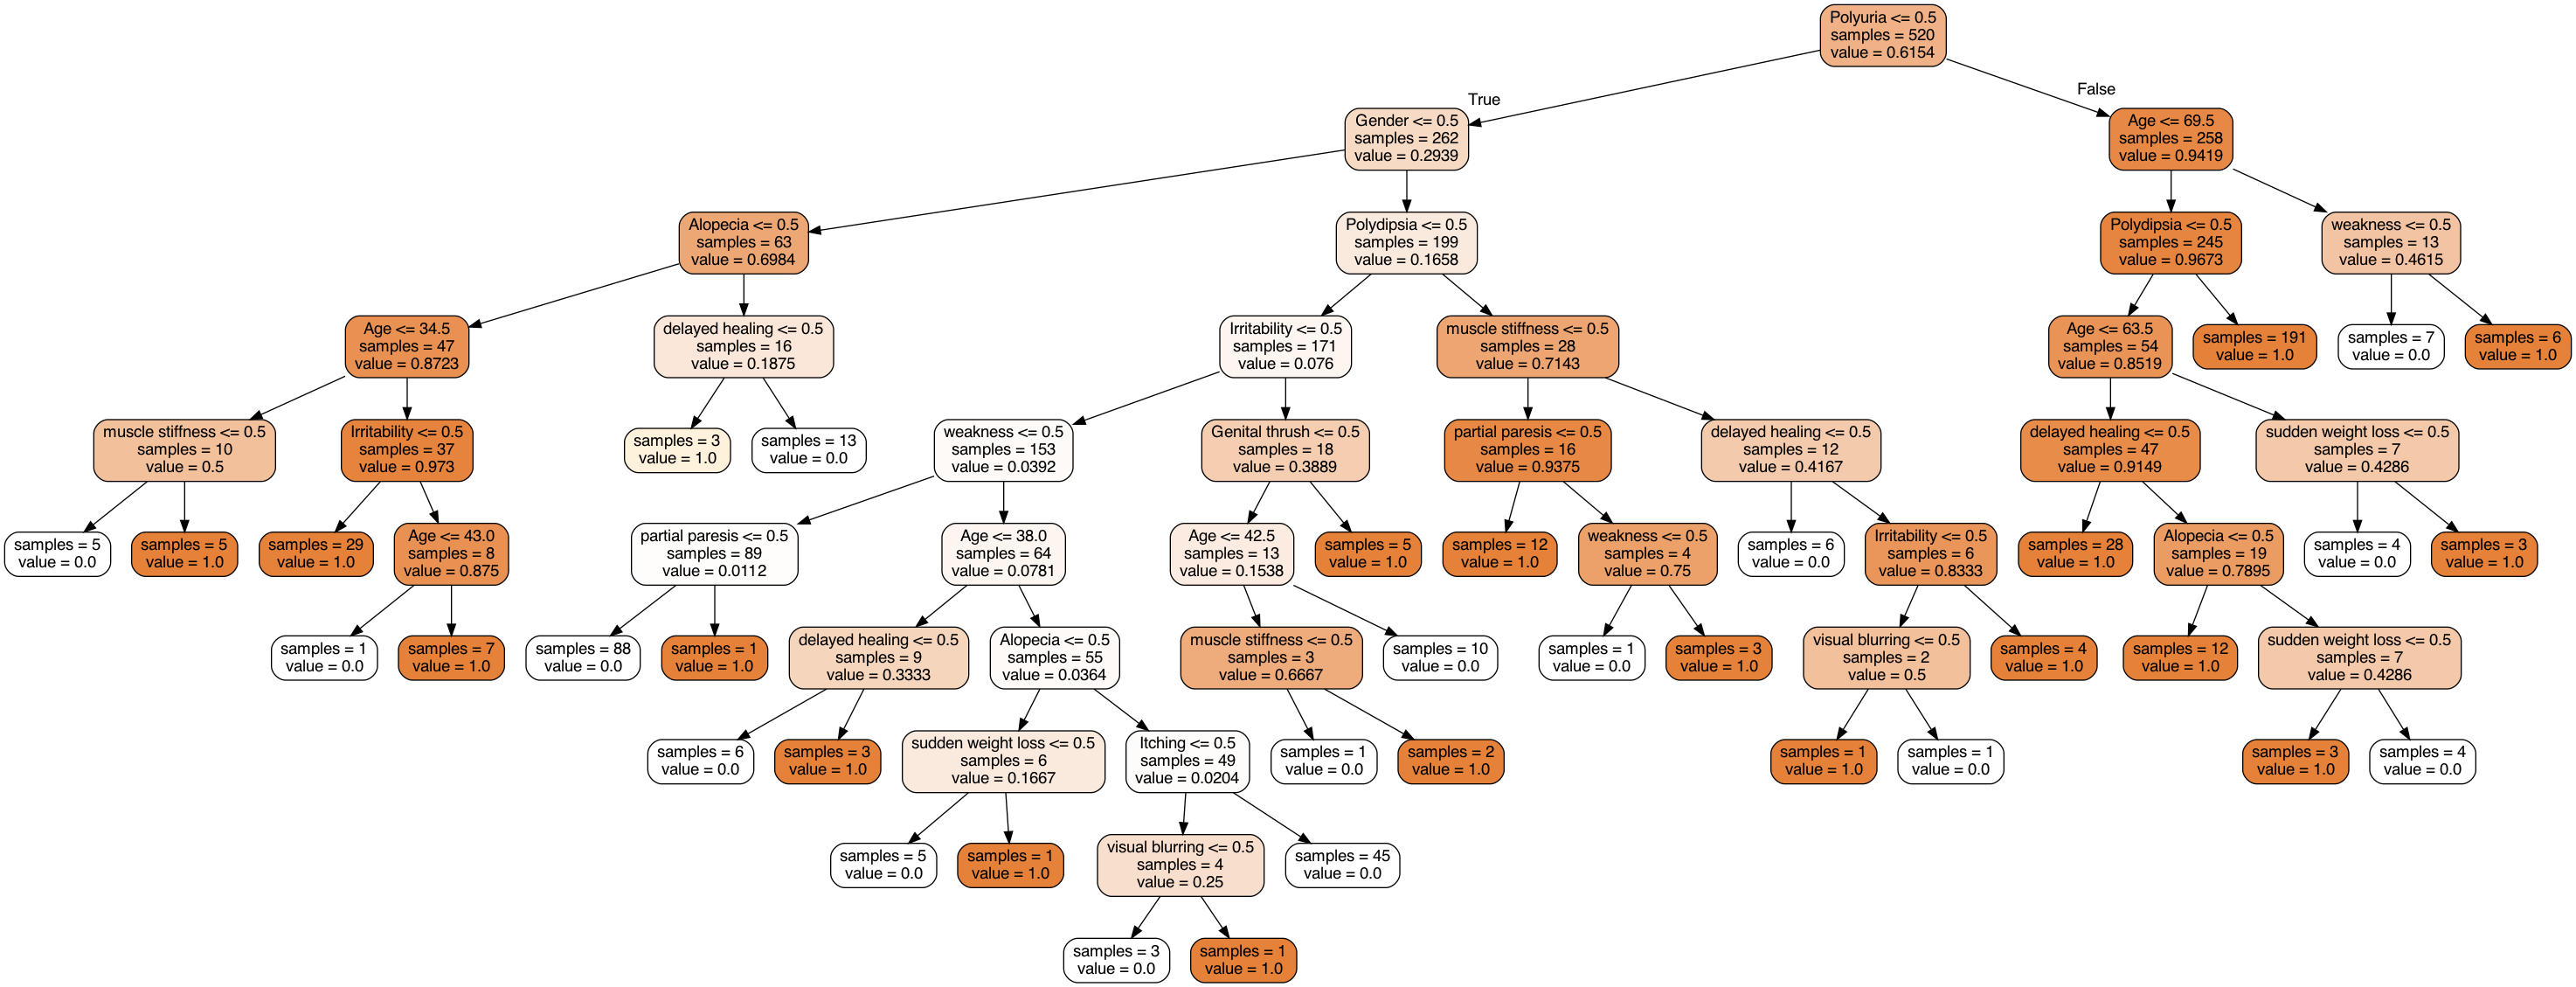

In [10]:

# dtr.fit(housing.data[:, [6, 7]], housing.target)
# dtr.fit()
dtr.fit(columns.values[:, :15], columns.values[:, 16])
dot_data = \
    tree.export_graphviz(
        dtr,
        out_file=None,
        feature_names=columns.columns,
        filled=True,
        impurity=False,
        rounded=True
    )
import pydotplus
graph = pydotplus.graph_from_dot_data(dot_data)
graph.get_nodes()[7].set_fillcolor("#FFF2DD")
from IPython.display import Image
Image(graph.create_png()) 

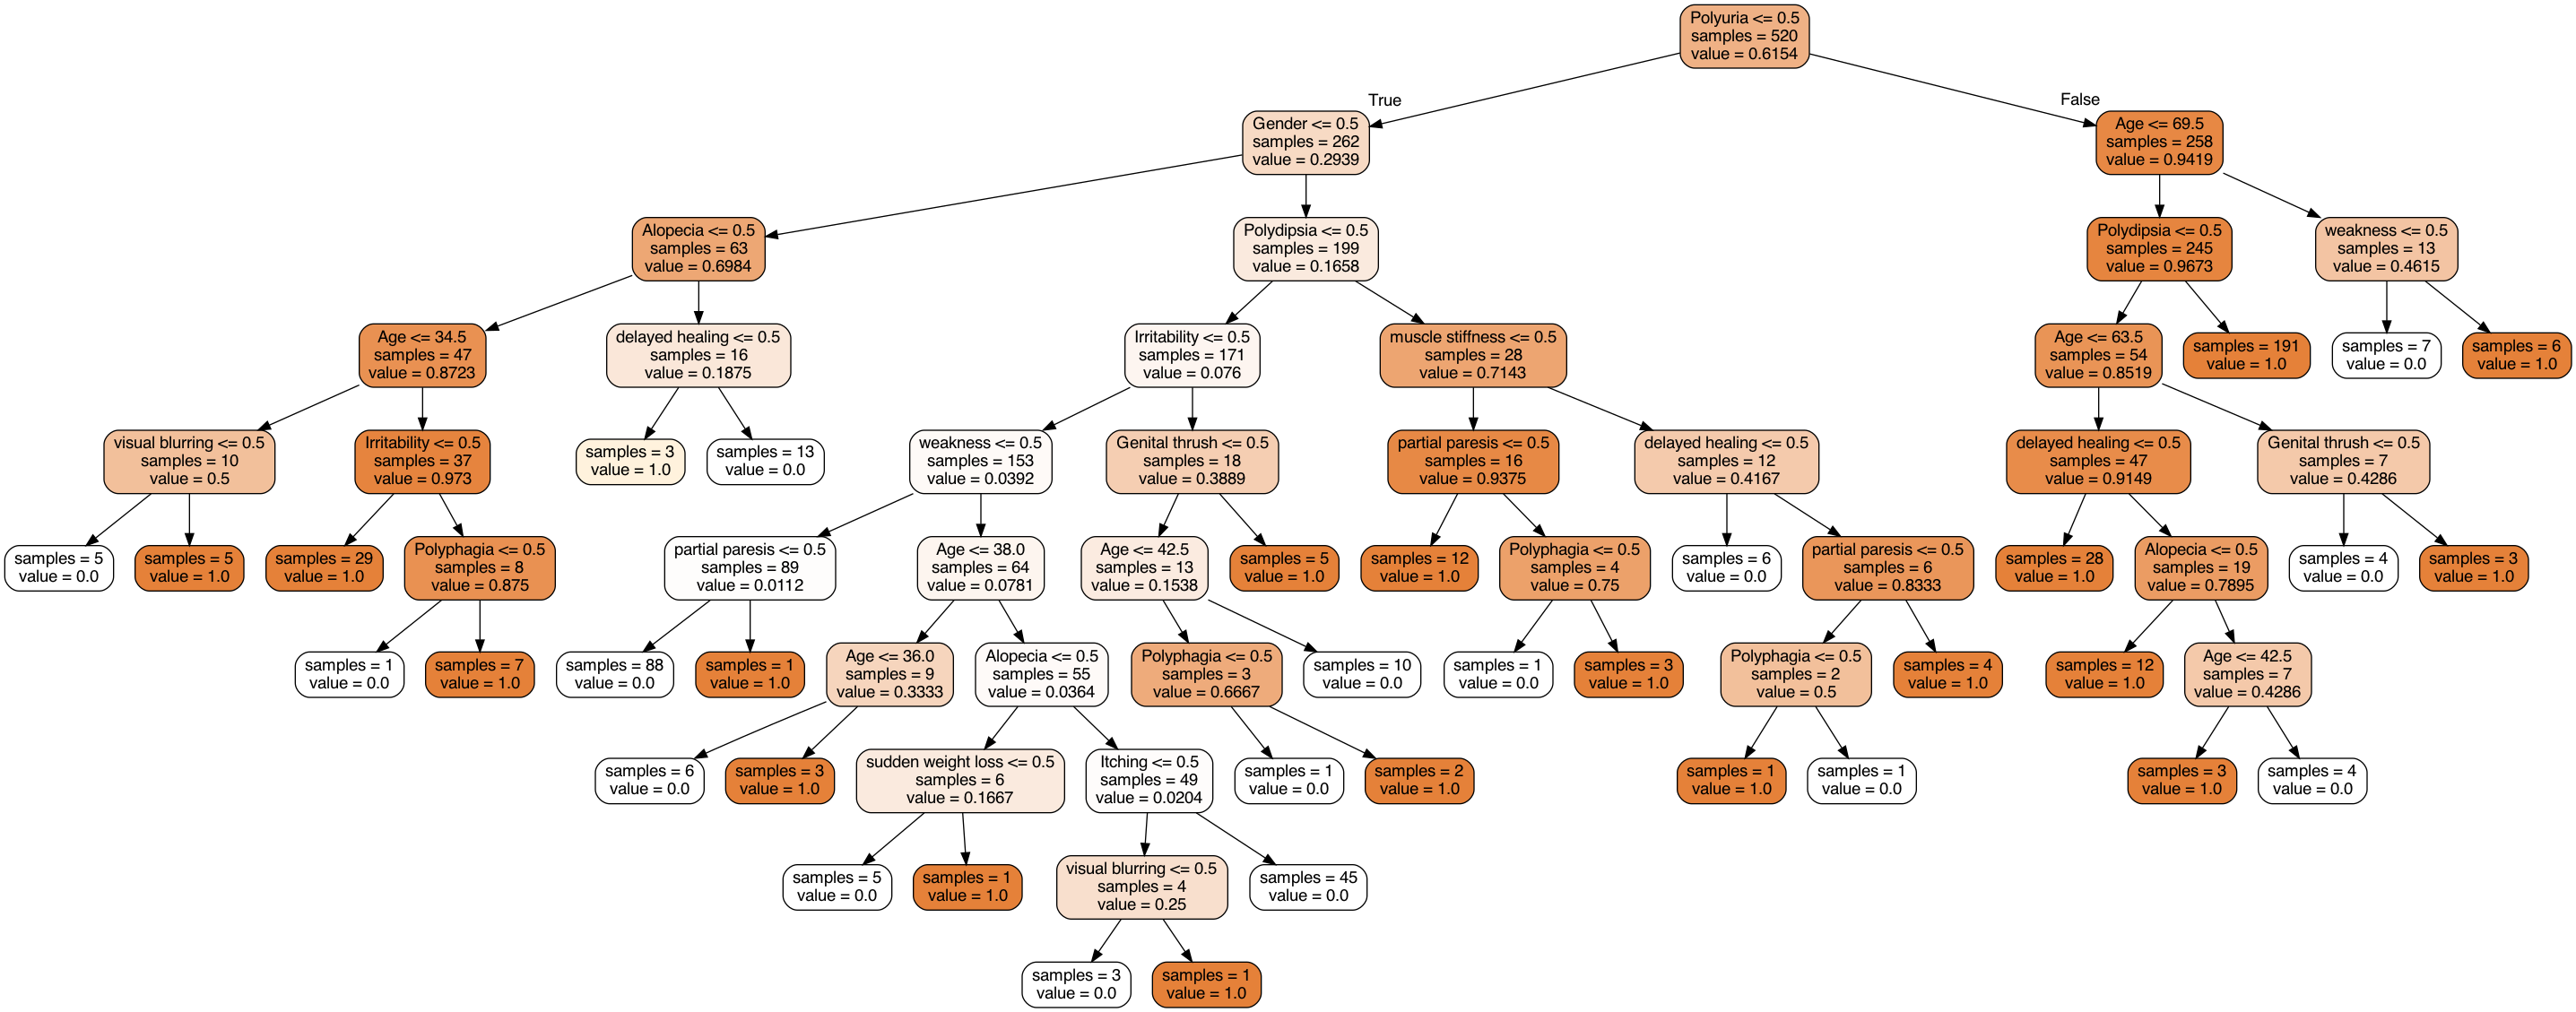

In [11]:
dtr = tree.DecisionTreeRegressor()
dtr.fit(columns.values[:,:15],columns.values[:,16])


dtr.fit(columns.values[:, :15], columns.values[:, 16])
dot_data = \
    tree.export_graphviz(
        dtr,
        out_file=None,
        feature_names=columns.columns,
        filled=True,
        impurity=False,
        rounded=True
    )
import pydotplus
graph = pydotplus.graph_from_dot_data(dot_data)
graph.get_nodes()[7].set_fillcolor("#FFF2DD")
from IPython.display import Image
Image(graph.create_png()) 

In [12]:
from sklearn.model_selection import train_test_split
data_train,data_test,target_train,target_test= train_test_split(columns.values[:,:15],columns.values[:,16],test_size=0.1,random_state=43)
dtr=tree.DecisionTreeRegressor(max_depth=10)

In [13]:
dtr.fit(data_train,target_train)

DecisionTreeRegressor(criterion='mse', max_depth=10, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [14]:
dtr.score(data_test,target_test)

0.9170653907496013

In [19]:
from sklearn.model_selection import train_test_split
data_train,data_test,target_train,target_test= train_test_split(columns.values[:,:15],columns.values[:,16],test_size=0.1,random_state=43)
dtr=tree.DecisionTreeRegressor()
dtr.fit(data_train,target_train)
dtr.score(data_test,target_test)

0.9170653907496013

In [20]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(random_state=42)
rfr.fit(data_train,target_train)
rfr.score(data_test,target_test)

0.8789154704944178

进行参数的调整

In [16]:
from sklearn.grid_search import GridSearchCV
tree_param_grid={'min_samples_split':list((3,6,9)),'n_estimators':list((2,4,8,16,32))}
grid=GridSearchCV(RandomForestRegressor(),param_grid=tree_param_grid,cv=5)
grid.fit(data_train,target_train)
grid.grid_scores_,grid.best_params_,grid.best_score_

/Users/nanji/miniconda3/envs/py35/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/nanji/miniconda3/envs/py35/lib/python3.5/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


([mean: 0.78529, std: 0.12854, params: {'min_samples_split': 3, 'n_estimators': 2},
  mean: 0.84685, std: 0.10152, params: {'min_samples_split': 3, 'n_estimators': 4},
  mean: 0.85053, std: 0.09569, params: {'min_samples_split': 3, 'n_estimators': 8},
  mean: 0.84742, std: 0.09124, params: {'min_samples_split': 3, 'n_estimators': 16},
  mean: 0.86184, std: 0.08707, params: {'min_samples_split': 3, 'n_estimators': 32},
  mean: 0.76178, std: 0.08889, params: {'min_samples_split': 6, 'n_estimators': 2},
  mean: 0.82734, std: 0.09099, params: {'min_samples_split': 6, 'n_estimators': 4},
  mean: 0.82184, std: 0.08977, params: {'min_samples_split': 6, 'n_estimators': 8},
  mean: 0.83742, std: 0.09262, params: {'min_samples_split': 6, 'n_estimators': 16},
  mean: 0.83423, std: 0.08125, params: {'min_samples_split': 6, 'n_estimators': 32},
  mean: 0.75730, std: 0.10130, params: {'min_samples_split': 9, 'n_estimators': 2},
  mean: 0.77729, std: 0.05707, params: {'min_samples_split': 9, 'n_estim

In [17]:
from sklearn.grid_search import GridSearchCV
tree_param_grid={'min_samples_split':list((3,6,9)),'n_estimators':list((2,4,8,16,32))}
grid=GridSearchCV(RandomForestRegressor(),param_grid=tree_param_grid,cv=5)
grid.fit(data_train,target_train)
grid.grid_scores_,grid.best_params_,grid.best_score_

([mean: 0.78782, std: 0.12414, params: {'min_samples_split': 3, 'n_estimators': 2},
  mean: 0.83641, std: 0.08112, params: {'min_samples_split': 3, 'n_estimators': 4},
  mean: 0.82725, std: 0.11398, params: {'min_samples_split': 3, 'n_estimators': 8},
  mean: 0.85497, std: 0.09684, params: {'min_samples_split': 3, 'n_estimators': 16},
  mean: 0.86681, std: 0.07770, params: {'min_samples_split': 3, 'n_estimators': 32},
  mean: 0.77191, std: 0.14056, params: {'min_samples_split': 6, 'n_estimators': 2},
  mean: 0.82016, std: 0.08877, params: {'min_samples_split': 6, 'n_estimators': 4},
  mean: 0.84630, std: 0.09105, params: {'min_samples_split': 6, 'n_estimators': 8},
  mean: 0.83819, std: 0.08015, params: {'min_samples_split': 6, 'n_estimators': 16},
  mean: 0.82861, std: 0.08829, params: {'min_samples_split': 6, 'n_estimators': 32},
  mean: 0.71260, std: 0.10288, params: {'min_samples_split': 9, 'n_estimators': 2},
  mean: 0.81268, std: 0.04495, params: {'min_samples_split': 9, 'n_estim